In [1]:
# Import Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading The DataSet.
crime=pd.read_csv('crime_data.csv')

# EDA

In [3]:
crime.head()

Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6

In [4]:
crime.tail()

Unnamed: 0  Murder  Assault  UrbanPop  Rape
45       Virginia     8.5      156        63  20.7
46     Washington     4.0      145        73  26.2
47  West Virginia     5.7       81        39   9.3
48      Wisconsin     2.6       53        66  10.8
49        Wyoming     6.8      161        60  15.6

In [5]:
crime.shape

(50, 5)

In [6]:
# Checking Null Values.
crime.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [7]:
# Checking Duplicate values.
crime[crime.duplicated()].sum()

Unnamed: 0    0.0
Murder        0.0
Assault       0.0
UrbanPop      0.0
Rape          0.0
dtype: float64

In [8]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [9]:
crime.describe()

Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000

In [18]:
# Droping The Unwanted Features.
crime=crime.rename({'Unnamed: 0':'Country'},axis=1)

In [19]:
crime.head()


Country  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6

In [24]:
#minmax=MinMaxScaler()
#minmax_df=minmax.fit_transform(airlines2)
#minmax_df
#The goal of normalization is to transform features to be on a similar scale.
#This improves the performance and training stability of the model.
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [26]:
from sklearn.preprocessing import normalize
df_norm = norm_func(crime.iloc[:,1:])
df_norm

Murder   Assault  UrbanPop      Rape
0   0.746988  0.654110  0.440678  0.359173
1   0.554217  0.746575  0.271186  0.961240
2   0.439759  0.852740  0.813559  0.612403
3   0.481928  0.496575  0.305085  0.315245
4   0.493976  0.791096  1.000000  0.860465
5   0.427711  0.544521  0.779661  0.811370
6   0.150602  0.222603  0.762712  0.098191
7   0.307229  0.660959  0.677966  0.219638
8   0.879518  0.993151  0.813559  0.635659
9   1.000000  0.568493  0.474576  0.478036
10  0.271084  0.003425  0.864407  0.333333
11  0.108434  0.256849  0.372881  0.178295
12  0.578313  0.698630  0.864407  0.431525
13  0.385542  0.232877  0.559322  0.354005
14  0.084337  0.037671  0.423729  0.103359
15  0.313253  0.239726  0.576271  0.276486
16  0.536145  0.219178  0.338983  0.232558
17  0.879518  0.698630  0.576271  0.385013
18  0.078313  0.130137  0.322034  0.012920
19  0.632530  0.873288  0.593220  0.529716
20  0.216867  0.356164  0.898305  0.232558
21  0.680723  0.719178  0.711864  0.718346
22  0.114458  0.092466  0.576271  0.196382
23  0.921687  0.732877  0.203390  0.253230
24  0.493976  0.455479  0.644068  0.540052
25  0.313253  0.219178  0.355932  0.235142
26  0.210843  0.195205  0.508475  0.237726
27  0.686747  0.708904  0.830508  1.000000
28  0.078313  0.041096  0.406780  0.056848
29  0.397590  0.390411  0.966102  0.297158
30  0.638554  0.821918  0.644068  0.640827
31  0.620482  0.715753  0.915254  0.485788
32  0.734940  1.000000  0.220339  0.227390
33  0.000000  0.000000  0.203390  0.000000
34  0.391566  0.256849  0.728814  0.364341
35  0.349398  0.363014  0.610169  0.328165
36  0.246988  0.390411  0.593220  0.568475
37  0.331325  0.208904  0.677966  0.196382
38  0.156627  0.441781  0.932203  0.025840
39  0.819277  0.801370  0.271186  0.392765
40  0.180723  0.140411  0.220339  0.142119
41  0.746988  0.489726  0.457627  0.506460
42  0.716867  0.534247  0.813559  0.470284
43  0.144578  0.256849  0.813559  0.403101
44  0.084337  0.010274  0.000000  0.100775
45  0.463855  0.380137  0.525424  0.346253
46  0.192771  0.342466  0.694915  0.488372
47  0.295181  0.123288  0.118644  0.051680
48  0.108434  0.027397  0.576271  0.090439
49  0.361446  0.397260  0.474576  0.214470

# 1.Hierarchical Clustering
Hierarchical clustering is an unsupervised learning technique used to group similar objects into clusters. It creates a hierarchy of clusters by merging or splitting them based on similarity measures.

Hierarchical clustering groups similar objects into a dendrogram. It merges similar clusters iteratively, starting with each data point as a separate cluster. This creates a tree-like structure that shows the relationships between clusters and their hierarchy.



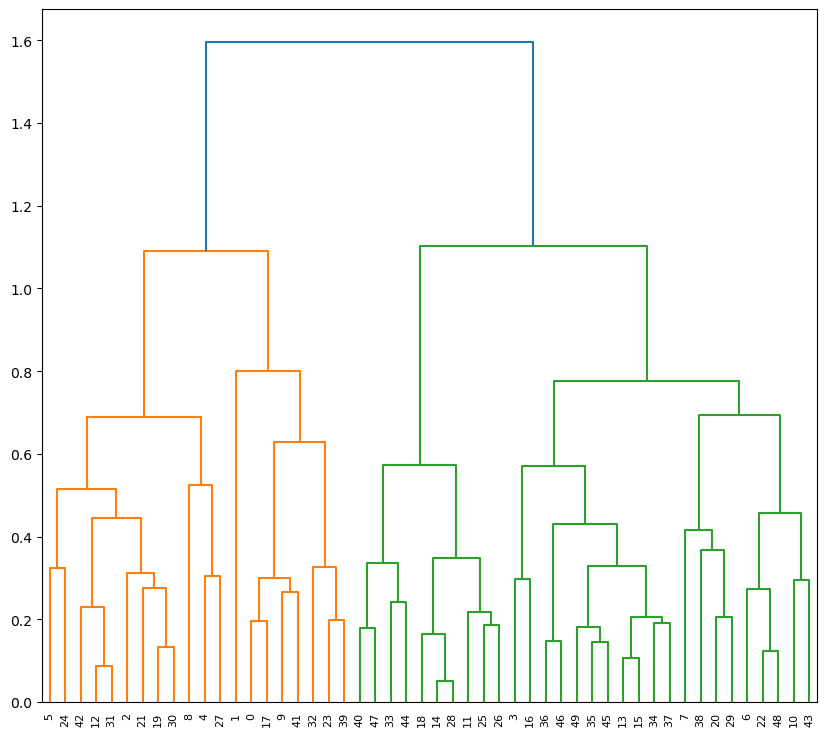

In [27]:

# A dendrogram is a tree-structured graph used in heat maps to visualize the result of a hierarchical clustering calculation. 
# The result of a clustering is presented either as the distance or the similarity between the clustered rows or columns depending on the selected distance measure.
plt.figure(figsize=(10, 9))
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='complete'))

In [28]:
# We assign each point to an individual cluster in this technique. Suppose there are 4 data points. 
# We will assign each of these points to a cluster and hence will have 4 clusters in the beginning.and Final it has only one cluster.
from sklearn.cluster import AgglomerativeClustering
crime2=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')

In [29]:
# Initialize The Model.
crime2.fit(df_norm)

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=5)

In [30]:
# Saving The Clusters For The Chart.
# Getting How many Clusters Each Data Point Have.
crime3=crime2.fit_predict(df_norm)

In [31]:
crime3

array([3, 4, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       0, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 0, 0], dtype=int64)

In [32]:
crime3.shape

(50,)

In [33]:
# Adding The H_Clusters To the DataFrame.
crime['h_clusters']=crime3

In [34]:
crime.head()

Country  Murder  Assault  UrbanPop  Rape  h_clusters
0     Alabama    13.2      236        58  21.2           3
1      Alaska    10.0      263        48  44.5           4
2     Arizona     8.1      294        80  31.0           1
3    Arkansas     8.8      190        50  19.5           0
4  California     9.0      276        91  40.6           1

In [35]:
crime.tail()

Country  Murder  Assault  UrbanPop  Rape  h_clusters
45       Virginia     8.5      156        63  20.7           0
46     Washington     4.0      145        73  26.2           0
47  West Virginia     5.7       81        39   9.3           2
48      Wisconsin     2.6       53        66  10.8           0
49        Wyoming     6.8      161        60  15.6           0

In [36]:
# Sorting The Clusters In Ascending Order.
crime4=crime.sort_values('h_clusters')
crime4.iloc[:,[0,-1]]

Country  h_clusters
49         Wyoming           0
20   Massachusetts           0
29      New Jersey           0
16        Kentucky           0
15          Kansas           0
34            Ohio           0
13         Indiana           0
35        Oklahoma           0
22       Minnesota           0
10          Hawaii           0
36          Oregon           0
38    Rhode Island           0
7         Delaware           0
6      Connecticut           0
43            Utah           0
3         Arkansas           0
45        Virginia           0
46      Washington           0
37    Pennsylvania           0
48       Wisconsin           0
42           Texas           1
31        New York           1
30      New Mexico           1
27          Nevada           1
24        Missouri           1
5         Colorado           1
4       California           1
21        Michigan           1
8          Florida           1
19        Maryland           1
2          Arizona           1
12        Illinois           1
44         Vermont           2
11           Idaho           2
25         Montana           2
40    South Dakota           2
47   West Virginia           2
18           Maine           2
28   New Hampshire           2
26        Nebraska           2
14            Iowa           2
33    North Dakota           2
9          Georgia           3
39  South Carolina           3
23     Mississippi           3
32  North Carolina           3
17       Louisiana           3
41       Tennessee           3
0          Alabama           3
1           Alaska           4

In [40]:
crime['h_clusters'].value_counts()

0    20
1    12
2    10
3     7
4     1
Name: h_clusters, dtype: int64

# 2.KMeans Clustering

The k-means clustering algorithm is an Iterative algorithm that divides a group of n datasets into k different clusters based on the similarity and their mean distance from the centroid of that particular subgroup/ formed.

Implementation of the K-Means Algorithm
The implementation and working of the K-Means algorithm are explained in the steps below:

Step 1: Select the value of K to decide the number of clusters (n_clusters) to be formed.

Step 2: Select random K points that will act as cluster centroids (cluster_centers).

Step 3: Assign each data point, based on their distance from the randomly selected points (Centroid), to the nearest/closest centroid, which will form the predefined clusters.

Step 4: Place a new centroid of each cluster.

Step 5: Repeat step no.3, which reassigns each datapoint to the new closest centroid of each cluster.

Step 6: If any reassignment occurs, then go to step 4; else, go to step 7.

Step 7: Finish



In [44]:
crime5=pd.read_csv('crime_data.csv')

In [45]:
crime5.head()

Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6

In [29]:
crime5.tail()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0

In [47]:
crime5=crime5.rename({'Unnamed: 0':'Country'},axis=1)
crime5

Country  Murder  Assault  UrbanPop  Rape
0          Alabama    13.2      236        58  21.2
1           Alaska    10.0      263        48  44.5
2          Arizona     8.1      294        80  31.0
3         Arkansas     8.8      190        50  19.5
4       California     9.0      276        91  40.6
5         Colorado     7.9      204        78  38.7
6      Connecticut     3.3      110        77  11.1
7         Delaware     5.9      238        72  15.8
8          Florida    15.4      335        80  31.9
9          Georgia    17.4      211        60  25.8
10          Hawaii     5.3       46        83  20.2
11           Idaho     2.6      120        54  14.2
12        Illinois    10.4      249        83  24.0
13         Indiana     7.2      113        65  21.0
14            Iowa     2.2       56        57  11.3
15          Kansas     6.0      115        66  18.0
16        Kentucky     9.7      109        52  16.3
17       Louisiana    15.4      249        66  22.2
18           Maine     2.1       83        51   7.8
19        Maryland    11.3      300        67  27.8
20   Massachusetts     4.4      149        85  16.3
21        Michigan    12.1      255        74  35.1
22       Minnesota     2.7       72        66  14.9
23     Mississippi    16.1      259        44  17.1
24        Missouri     9.0      178        70  28.2
25         Montana     6.0      109        53  16.4
26        Nebraska     4.3      102        62  16.5
27          Nevada    12.2      252        81  46.0
28   New Hampshire     2.1       57        56   9.5
29      New Jersey     7.4      159        89  18.8
30      New Mexico    11.4      285        70  32.1
31        New York    11.1      254        86  26.1
32  North Carolina    13.0      337        45  16.1
33    North Dakota     0.8       45        44   7.3
34            Ohio     7.3      120        75  21.4
35        Oklahoma     6.6      151        68  20.0
36          Oregon     4.9      159        67  29.3
37    Pennsylvania     6.3      106        72  14.9
38    Rhode Island     3.4      174        87   8.3
39  South Carolina    14.4      279        48  22.5
40    South Dakota     3.8       86        45  12.8
41       Tennessee    13.2      188        59  26.9
42           Texas    12.7      201        80  25.5
43            Utah     3.2      120        80  22.9
44         Vermont     2.2       48        32  11.2
45        Virginia     8.5      156        63  20.7
46      Washington     4.0      145        73  26.2
47   West Virginia     5.7       81        39   9.3
48       Wisconsin     2.6       53        66  10.8
49         Wyoming     6.8      161        60  15.6

In [48]:
# Standardize The Given DataSet.
scaler=StandardScaler()
scaled_crime_df=scaler.fit_transform(crime5.iloc[:,1:])
scaled_crime_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

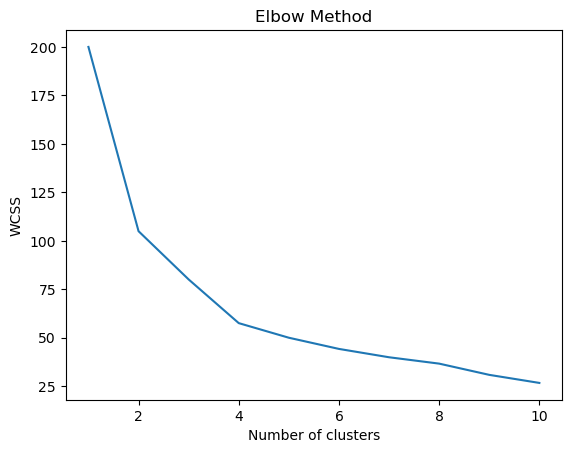

In [49]:
# WCSS Means Within Cluster-Sum OF Squares.
# To Find The Best value Of K(Optimal Numberf OF Clusters) We Use Elbo Curve Method.
# We can choose the right number of clusters with the help of the Within-Cluster-Sum-of-Squares (WCSS) method. 
# WCSS stands for the sum of the squares of distances of the data points in each and every cluster from its centroid.
# The main idea is to minimize the distance (e.g., euclidean distance) between the data points and the centroid of the clusters.
# The process is iterated until we reach a minimum value for the sum of distances.
# Inertia measures how well a dataset was clustered by K-Means.
# A good model is one with low inertia AND a low number of clusters ( K ).

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_crime_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [50]:
# Initialize The Model.
crime_new = KMeans(4, random_state=42)
crime_new.fit(scaled_crime_df)

KMeans(n_clusters=4, random_state=42)

In [51]:
crime_new.labels_

array([1, 3, 3, 1, 3, 3, 0, 0, 3, 1, 0, 2, 3, 0, 2, 0, 2, 1, 2, 3, 0, 3,
       2, 1, 3, 2, 2, 3, 2, 0, 3, 3, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 3, 0,
       2, 0, 0, 2, 2, 0])

In [52]:
crime5['clusterid_new'] = crime_new.labels_

In [53]:
crime5


Country  Murder  Assault  UrbanPop  Rape  clusterid_new
0          Alabama    13.2      236        58  21.2              1
1           Alaska    10.0      263        48  44.5              3
2          Arizona     8.1      294        80  31.0              3
3         Arkansas     8.8      190        50  19.5              1
4       California     9.0      276        91  40.6              3
5         Colorado     7.9      204        78  38.7              3
6      Connecticut     3.3      110        77  11.1              0
7         Delaware     5.9      238        72  15.8              0
8          Florida    15.4      335        80  31.9              3
9          Georgia    17.4      211        60  25.8              1
10          Hawaii     5.3       46        83  20.2              0
11           Idaho     2.6      120        54  14.2              2
12        Illinois    10.4      249        83  24.0              3
13         Indiana     7.2      113        65  21.0              0
14            Iowa     2.2       56        57  11.3              2
15          Kansas     6.0      115        66  18.0              0
16        Kentucky     9.7      109        52  16.3              2
17       Louisiana    15.4      249        66  22.2              1
18           Maine     2.1       83        51   7.8              2
19        Maryland    11.3      300        67  27.8              3
20   Massachusetts     4.4      149        85  16.3              0
21        Michigan    12.1      255        74  35.1              3
22       Minnesota     2.7       72        66  14.9              2
23     Mississippi    16.1      259        44  17.1              1
24        Missouri     9.0      178        70  28.2              3
25         Montana     6.0      109        53  16.4              2
26        Nebraska     4.3      102        62  16.5              2
27          Nevada    12.2      252        81  46.0              3
28   New Hampshire     2.1       57        56   9.5              2
29      New Jersey     7.4      159        89  18.8              0
30      New Mexico    11.4      285        70  32.1              3
31        New York    11.1      254        86  26.1              3
32  North Carolina    13.0      337        45  16.1              1
33    North Dakota     0.8       45        44   7.3              2
34            Ohio     7.3      120        75  21.4              0
35        Oklahoma     6.6      151        68  20.0              0
36          Oregon     4.9      159        67  29.3              0
37    Pennsylvania     6.3      106        72  14.9              0
38    Rhode Island     3.4      174        87   8.3              0
39  South Carolina    14.4      279        48  22.5              1
40    South Dakota     3.8       86        45  12.8              2
41       Tennessee    13.2      188        59  26.9              1
42           Texas    12.7      201        80  25.5              3
43            Utah     3.2      120        80  22.9              0
44         Vermont     2.2       48        32  11.2              2
45        Virginia     8.5      156        63  20.7              0
46      Washington     4.0      145        73  26.2              0
47   West Virginia     5.7       81        39   9.3              2
48       Wisconsin     2.6       53        66  10.8              2
49         Wyoming     6.8      161        60  15.6              0

In [54]:
crime5.groupby('clusterid_new').agg(['mean']).reset_index()

clusterid_new     Murder     Assault   UrbanPop       Rape
                      mean        mean       mean       mean
0             0   5.656250  138.875000  73.875000  18.781250
1             1  13.937500  243.625000  53.750000  21.412500
2             2   3.600000   78.538462  52.076923  12.176923
3             3  10.815385  257.384615  76.000000  33.192308

In [55]:
# The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation).
from sklearn.metrics import silhouette_samples, silhouette_score

In [56]:
predict=kmeans.fit_predict(scaled_crime_df)

In [57]:
predict

array([2, 9, 5, 7, 0, 0, 3, 8, 5, 2, 3, 1, 5, 8, 1, 8, 7, 2, 6, 5, 3, 5,
       1, 4, 8, 7, 1, 0, 1, 3, 5, 5, 4, 6, 8, 8, 8, 3, 3, 4, 6, 2, 5, 3,
       6, 8, 8, 6, 1, 7])

In [58]:
silhouette_score_average = silhouette_score(scaled_crime_df, predict)

In [59]:
silhouette_score_average

0.2623531810552387

In [62]:
silhouette_score_average1 = silhouette_score(scaled_crime_df, crime_new.predict(scaled_crime_df))
silhouette_score_average1

0.33968891433344395

# 3.DBSCAN(Density-based spatial clustering of applications with noise)

K-Means and Hierarchical Clustering both fail in creating clusters of arbitrary shapes. They are not able to form clusters based on varying densities. That’s why we need DBSCAN clustering.

DBSCAN requires only two parameters: epsilon and minPoints. Epsilon is the radius of the circle to be created around each data point to check the density and minPoints is the minimum number of data points required inside that circle for that data point to be classified as a Core point.


In [63]:
df=pd.read_csv('crime_data.csv')

In [64]:
df.head()

Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6

In [65]:
df.tail()

Unnamed: 0  Murder  Assault  UrbanPop  Rape
45       Virginia     8.5      156        63  20.7
46     Washington     4.0      145        73  26.2
47  West Virginia     5.7       81        39   9.3
48      Wisconsin     2.6       53        66  10.8
49        Wyoming     6.8      161        60  15.6

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [67]:
df.shape

(50, 5)

In [68]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

Murder  Assault  UrbanPop  Rape
0     13.2      236        58  21.2
1     10.0      263        48  44.5
2      8.1      294        80  31.0
3      8.8      190        50  19.5
4      9.0      276        91  40.6
5      7.9      204        78  38.7
6      3.3      110        77  11.1
7      5.9      238        72  15.8
8     15.4      335        80  31.9
9     17.4      211        60  25.8
10     5.3       46        83  20.2
11     2.6      120        54  14.2
12    10.4      249        83  24.0
13     7.2      113        65  21.0
14     2.2       56        57  11.3
15     6.0      115        66  18.0
16     9.7      109        52  16.3
17    15.4      249        66  22.2
18     2.1       83        51   7.8
19    11.3      300        67  27.8
20     4.4      149        85  16.3
21    12.1      255        74  35.1
22     2.7       72        66  14.9
23    16.1      259        44  17.1
24     9.0      178        70  28.2
25     6.0      109        53  16.4
26     4.3      102        62  16.5
27    12.2      252        81  46.0
28     2.1       57        56   9.5
29     7.4      159        89  18.8
30    11.4      285        70  32.1
31    11.1      254        86  26.1
32    13.0      337        45  16.1
33     0.8       45        44   7.3
34     7.3      120        75  21.4
35     6.6      151        68  20.0
36     4.9      159        67  29.3
37     6.3      106        72  14.9
38     3.4      174        87   8.3
39    14.4      279        48  22.5
40     3.8       86        45  12.8
41    13.2      188        59  26.9
42    12.7      201        80  25.5
43     3.2      120        80  22.9
44     2.2       48        32  11.2
45     8.5      156        63  20.7
46     4.0      145        73  26.2
47     5.7       81        39   9.3
48     2.6       53        66  10.8
49     6.8      161        60  15.6

In [69]:
scaler=StandardScaler()
X=scaler.fit_transform(df)
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [70]:
# To Know The Optimal value of Epesilon we can use K-Distance Graph.
# The distance variable contains an array of distances between a data point and its nearest data point for all data points in the dataset.
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)


In [71]:
distances, indices

(array([[0.        , 0.78006247],
        [0.        , 2.07898369],
        [0.        , 1.0482199 ],
        [0.        , 1.0013278 ],
        [0.        , 1.20897691],
        [0.        , 1.24886253],
        [0.        , 0.88100359],
        [0.        , 1.19227586],
        [0.        , 1.30974334],
        [0.        , 0.86797806],
        [0.        , 1.08184506],
        [0.        , 0.75913104],
        [0.        , 0.35377437],
        [0.        , 0.43312429],
        [0.        , 0.2079438 ],
        [0.        , 0.43312429],
        [0.        , 0.8610239 ],
        [0.        , 0.78006247],
        [0.        , 0.50466926],
        [0.        , 0.54082482],
        [0.        , 0.80586349],
        [0.        , 0.58411812],
        [0.        , 0.49909939],
        [0.        , 0.79455301],
        [0.        , 0.98866758],
        [0.        , 0.74649625],
        [0.        , 0.53326883],
        [0.        , 1.20897691],
        [0.        , 0.2079438 ],
        [0.   

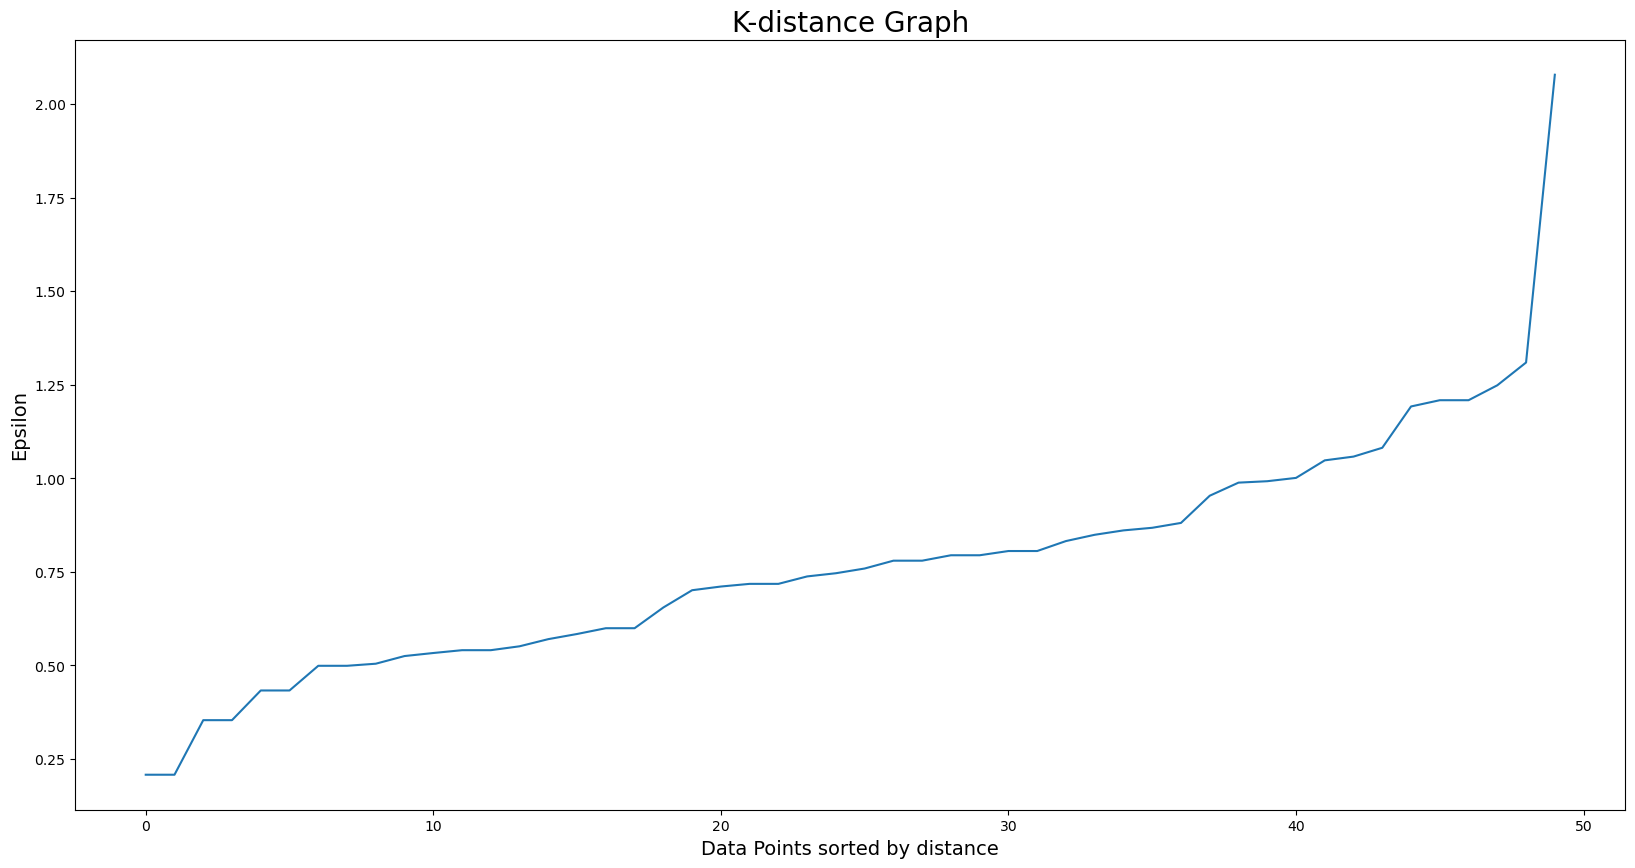

In [72]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()


In [73]:
# The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph, which is 2.
dbscan = DBSCAN(eps=2, min_samples=4)
dbscan.fit_predict(X)

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [74]:
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [75]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

cluster
0         0
1        -1
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
30        0
31        0
32        0
33        0
34        0
35        0
36        0
37        0
38        0
39        0
40        0
41        0
42        0
43        0
44        0
45        0
46        0
47        0
48        0
49        0

In [76]:
clustered = pd.concat([df,cl],axis=1)
clustered

Murder  Assault  UrbanPop  Rape  cluster
0     13.2      236        58  21.2        0
1     10.0      263        48  44.5       -1
2      8.1      294        80  31.0        0
3      8.8      190        50  19.5        0
4      9.0      276        91  40.6        0
5      7.9      204        78  38.7        0
6      3.3      110        77  11.1        0
7      5.9      238        72  15.8        0
8     15.4      335        80  31.9        0
9     17.4      211        60  25.8        0
10     5.3       46        83  20.2        0
11     2.6      120        54  14.2        0
12    10.4      249        83  24.0        0
13     7.2      113        65  21.0        0
14     2.2       56        57  11.3        0
15     6.0      115        66  18.0        0
16     9.7      109        52  16.3        0
17    15.4      249        66  22.2        0
18     2.1       83        51   7.8        0
19    11.3      300        67  27.8        0
20     4.4      149        85  16.3        0
21    12.1      255        74  35.1        0
22     2.7       72        66  14.9        0
23    16.1      259        44  17.1        0
24     9.0      178        70  28.2        0
25     6.0      109        53  16.4        0
26     4.3      102        62  16.5        0
27    12.2      252        81  46.0        0
28     2.1       57        56   9.5        0
29     7.4      159        89  18.8        0
30    11.4      285        70  32.1        0
31    11.1      254        86  26.1        0
32    13.0      337        45  16.1        0
33     0.8       45        44   7.3        0
34     7.3      120        75  21.4        0
35     6.6      151        68  20.0        0
36     4.9      159        67  29.3        0
37     6.3      106        72  14.9        0
38     3.4      174        87   8.3        0
39    14.4      279        48  22.5        0
40     3.8       86        45  12.8        0
41    13.2      188        59  26.9        0
42    12.7      201        80  25.5        0
43     3.2      120        80  22.9        0
44     2.2       48        32  11.2        0
45     8.5      156        63  20.7        0
46     4.0      145        73  26.2        0
47     5.7       81        39   9.3        0
48     2.6       53        66  10.8        0
49     6.8      161        60  15.6        0

In [77]:
# Outlier Detection.
# The most amazing thing about DBSCAN is that it separates noise from the dataset pretty well. Here, 0, 1 and 2 etc are the different clusters, and -1 is the noise.
clustered[clustered['cluster']==-1]

Murder  Assault  UrbanPop  Rape  cluster
1    10.0      263        48  44.5       -1

In [78]:
clustered['cluster'].value_counts()

 0    49
-1     1
Name: cluster, dtype: int64

In [79]:
clustered.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
cluster      -0.020
dtype: float64